In [242]:
import os
import pymc as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.style.use("bmh")
mpl.rcParams["figure.figsize"] = (9,8)
mpl.rcParams["font.size"] = 8

print(os.sys.version)
print(pm.__version__)

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
5.1.1


In [243]:
data_path = "data/Spaceship-Titanic/spaceship-titanic-data/train.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.info()

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [244]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [245]:
df.isnull().sum() / df.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [246]:
df.columns = [col.lower() for col in df.columns]

In [247]:
df = df.dropna(axis=0, subset=["name"])#.dropna(axis=1)
df = df.fillna(value=df.mode().iloc[0])

In [248]:
df["transported"].value_counts() / len(df)

True     0.503591
False    0.496409
Name: transported, dtype: float64

In [249]:
df["transported"] = df["transported"].replace(to_replace={True:1, False:0})

In [250]:
df["transported"].sum()

4277

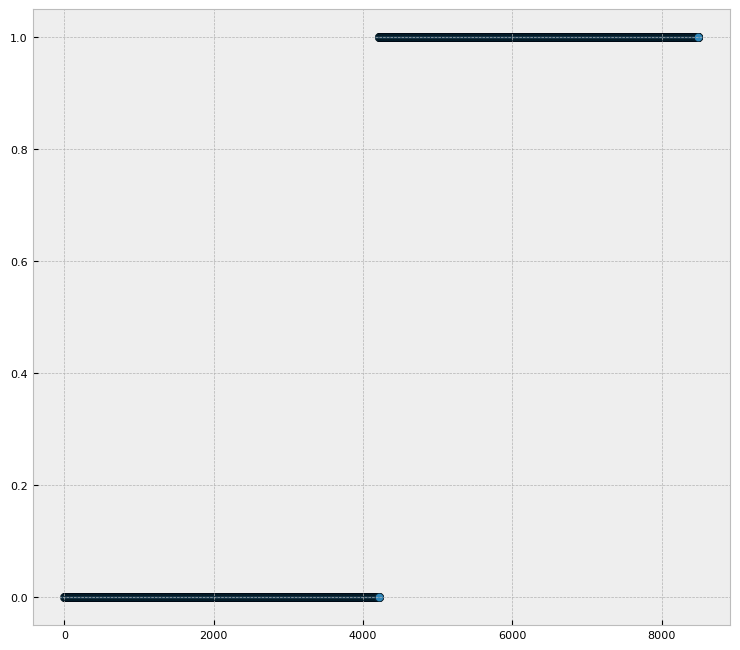

In [251]:
df = df.sort_values(by="transported")
plt.scatter(range(df.shape[0]), df.transported, marker='o', edgecolor='k', alpha=.3)
plt.show()

In [252]:
df.reset_index(drop=True, inplace=True)

In [253]:
df = df.select_dtypes(include=[np.number]).apply(lambda x: np.sqrt(x))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8493.0,5.124411,1.536964,0.0,4.358899,5.196152,6.082763,8.888194
roomservice,8493.0,6.708493,13.205191,0.0,0.000000,0.000000,6.324555,119.695447
foodcourt,8493.0,9.042582,19.148218,0.0,0.000000,0.000000,7.874008,172.664414
shoppingmall,8493.0,5.699234,11.630815,0.0,0.000000,0.000000,4.690416,110.693270
spa,8493.0,7.527579,15.762878,0.0,0.000000,0.000000,7.280110,149.693019
vrdeck,8493.0,7.264473,15.579864,0.0,0.000000,0.000000,6.324555,142.604348
transported,8493.0,0.503591,0.500017,0.0,0.000000,1.000000,1.000000,1.000000


In [254]:
from scipy.special import expit
import arviz as az

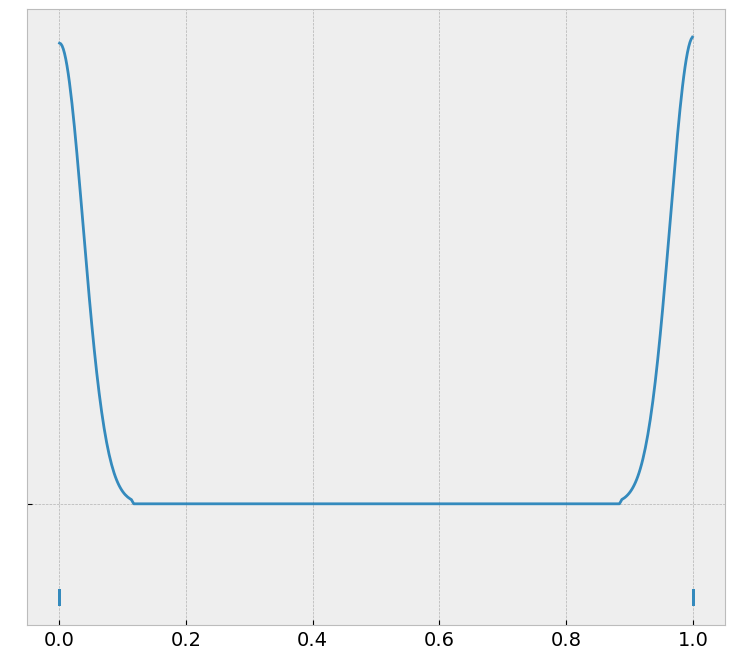

In [255]:
az.plot_kde(df["transported"].values, rug=True)
plt.yticks([0], alpha=0)
plt.show()

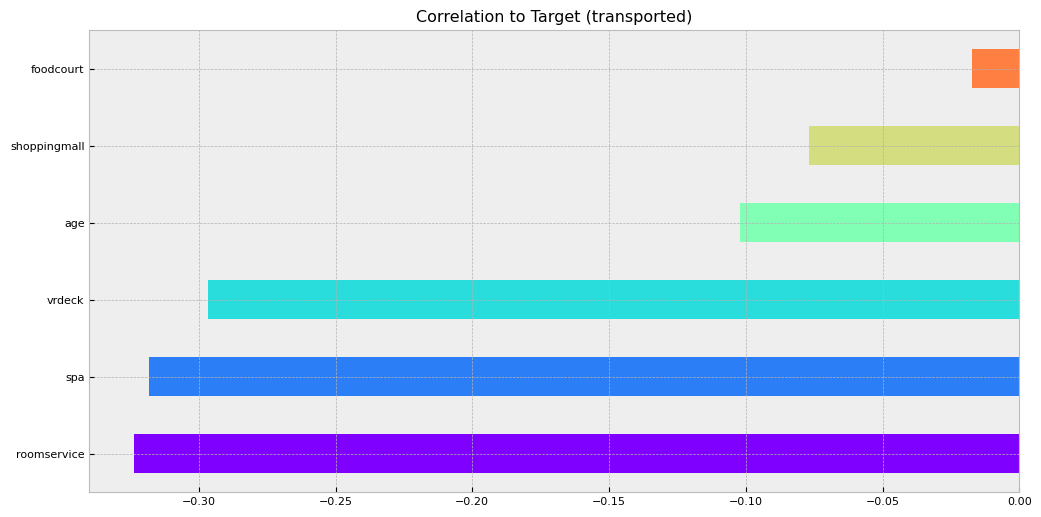


 foodcourt      -0.017343
shoppingmall   -0.076784
age            -0.102260
vrdeck         -0.296684
spa            -0.318037
roomservice    -0.323746
dtype: float64


In [256]:
n_fts = len(df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

df.drop('transported',axis=1).corrwith(df.transported, numeric_only=True).sort_values(ascending=True).plot(kind='barh', 
                                                                                     color=colors, figsize=(12, 6))
plt.title('Correlation to Target (transported)')
plt.show()

print('\n', df.drop('transported',axis=1).corrwith(df.transported, numeric_only=True).sort_values(ascending=False))

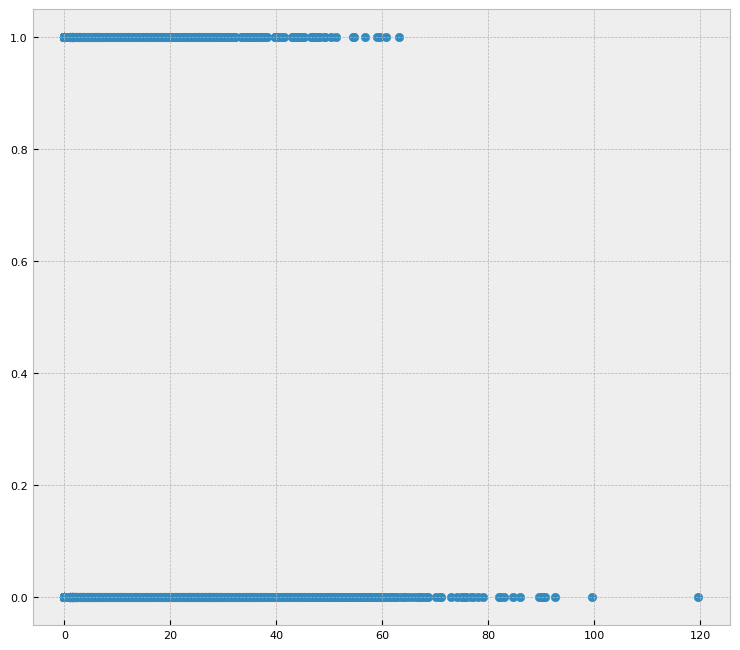

In [257]:
plt.scatter(df["roomservice"], df["transported"])

In [268]:
x = df["roomservice"] - df["roomservice"].mean()

coords = {"observation": df.index.values}
with pm.Model(coords=coords) as logistic_model:
    x = pm.ConstantData("x", x, dims="observation")
    α = pm.Normal("α", mu=0, sigma=10)
    β1 = pm.Normal("β1", mu=0, sigma=10)
    #β2 = pm.Normal("β2", mu=0, sigma=100)
    #β3 = pm.Normal("β3", mu=0, sigma=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    μ = α + β1 * x #+ β2 * df.spa.to_numpy() + β3 * df.vrdeck.to_numpy()) # likelihood
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ), dims="observation")

    y_1 = pm.Bernoulli('y_1', p=θ, observed=df.transported.to_numpy())
    
    trace = pm.sample(1000, chains=4, cores=6, init = 'adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [α, β1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Chain <xarray.DataArray 'chain' ()>
array(0)
Coordinates:
    chain    int64 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(1)
Coordinates:
    chain    int64 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(2)
Coordinates:
    chain    int64 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(3)
Coordinates:
    chain    int64 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [282]:
N = df["transported"].sum()
x = df["roomservice"] - df["roomservice"].mean()

coords = {"observation": df.index.values}
with pm.Model(coords=coords) as logistic_model:
    x = pm.ConstantData("x", x, dims="observation")
    α = pm.Normal("α", mu=0, sigma=1)
    β1 = pm.Normal("β1", mu=0, sigma=1)
    #β2 = pm.Normal("β2", mu=0, sigma=100)
    #β3 = pm.Normal("β3", mu=0, sigma=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    μ = α + β1 * x #+ β2 * df.spa.to_numpy() + β3 * df.vrdeck.to_numpy()) # likelihood
    p = pm.Deterministic("θ", pm.math.invlogit(μ), dims="observation")
    # likelihood
    y_1 = pm.Binomial('y_1', n=N, p=p, observed=df["transported"], dims="observation")
    trace = pm.sample(1000, chains=4, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 8 jobs)
NUTS: [α, β1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Chain <xarray.DataArray 'chain' ()>
array(0)
Coordinates:
    chain    int64 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(1)
Coordinates:
    chain    int64 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(2)
Coordinates:
    chain    int64 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(3)
Coordinates:
    chain    int64 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


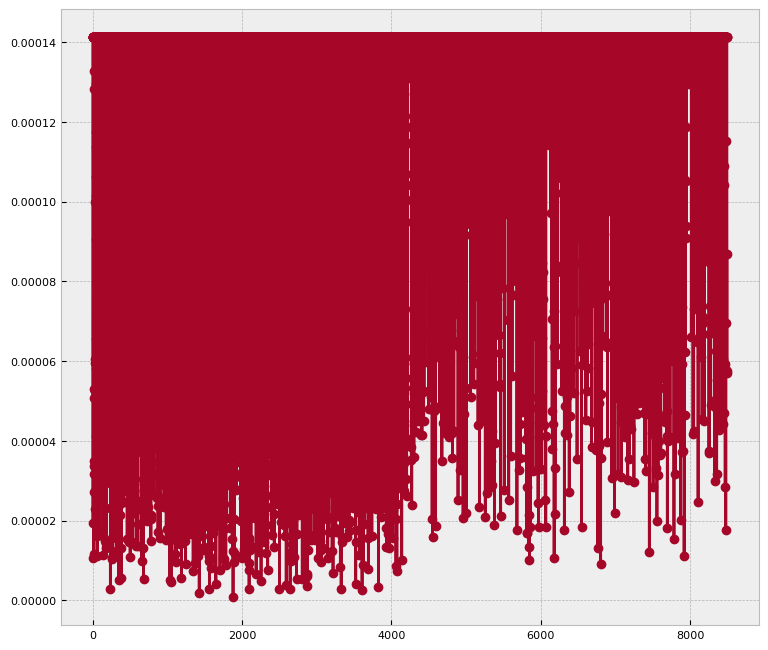

In [283]:
fig, ax = plt.subplots()
# posterior mean
post_mean = trace.posterior.θ.mean(("chain", "draw"))
ax.plot(post_mean, label="posterior mean", color="C1", marker='o')

In [284]:
pm.summary(trace, var_names=["α", "β1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-9.156,0.018,-9.190,-9.123,0.0,0.0,2448.0,2652.0,1.0
β1,-0.043,0.002,-0.047,-0.039,0.0,0.0,2553.0,2845.0,1.0


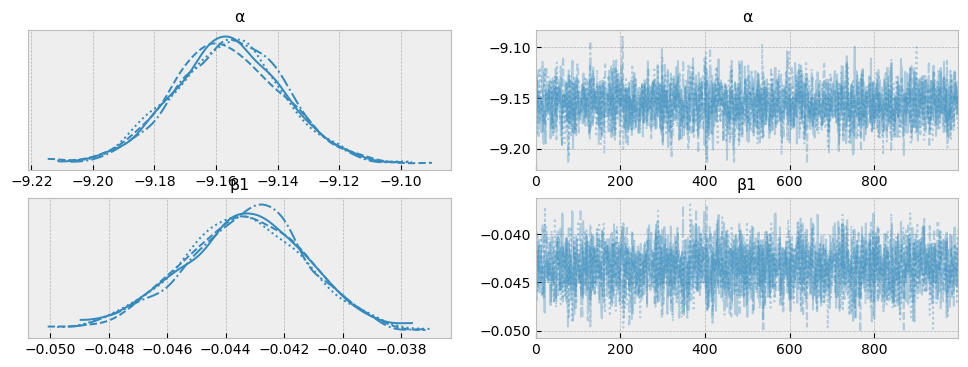

In [285]:
az.plot_trace(trace, var_names=["α", "β1"]);

In [286]:
post_mean = trace.posterior.θ.mean(("chain", "draw"))
post_mean

<xarray.DataArray 'θ' (observation: 8493)>
array([1.41250088e-04, 1.41250088e-04, 1.41250088e-04, ...,
       1.41250088e-04, 5.75444636e-05, 8.68034128e-05])
Coordinates:
  * observation  (observation) int64 0 1 2 3 4 5 ... 8488 8489 8490 8491 8492

In [273]:
trace.posterior

<xarray.Dataset>
Dimensions:      (chain: 4, draw: 1000, observation: 8493)
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * observation  (observation) int64 0 1 2 3 4 5 ... 8488 8489 8490 8491 8492
Data variables:
    α            (chain, draw) float64 -0.03061 -0.07708 ... -0.07364 -0.08308
    β1           (chain, draw) float64 -0.06702 -0.0742 ... -0.06487 -0.07003
    θ            (chain, draw, observation) float64 0.6032 0.6032 ... 0.4015
Attributes:
    created_at:                 2023-09-18T20:27:53.759114
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.1.1
    sampling_time:              3.1012630462646484
    tuning_steps:               1000

In [287]:
alpha_mean = trace.posterior.α.mean(("chain", "draw")).to_numpy()
beta_mean = trace.posterior.β1.mean(("chain", "draw")).to_numpy()

In [288]:
x = alpha_mean+beta_mean*df.shoppingmall.to_numpy()

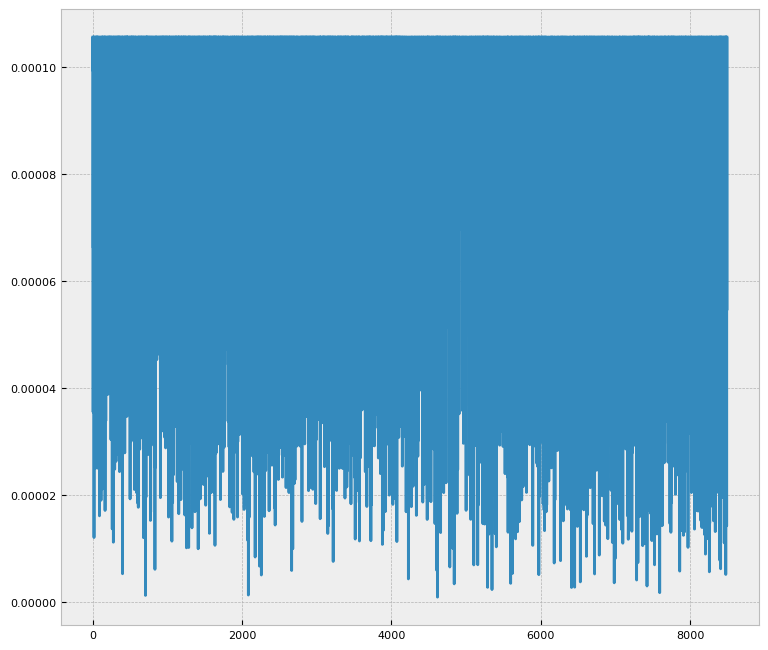

In [289]:
plt.plot(expit(x))

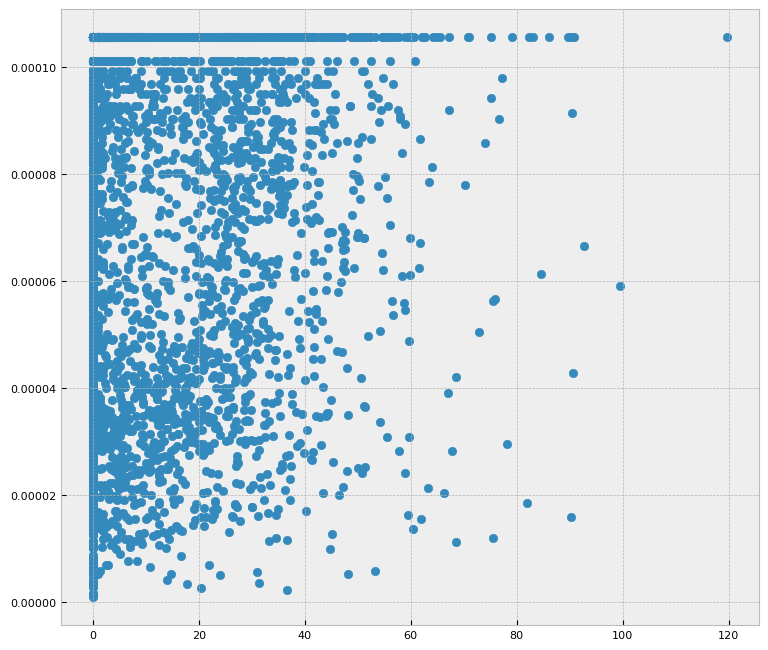

In [290]:
plt.scatter(df["roomservice"], expit(x))

<Axes: >

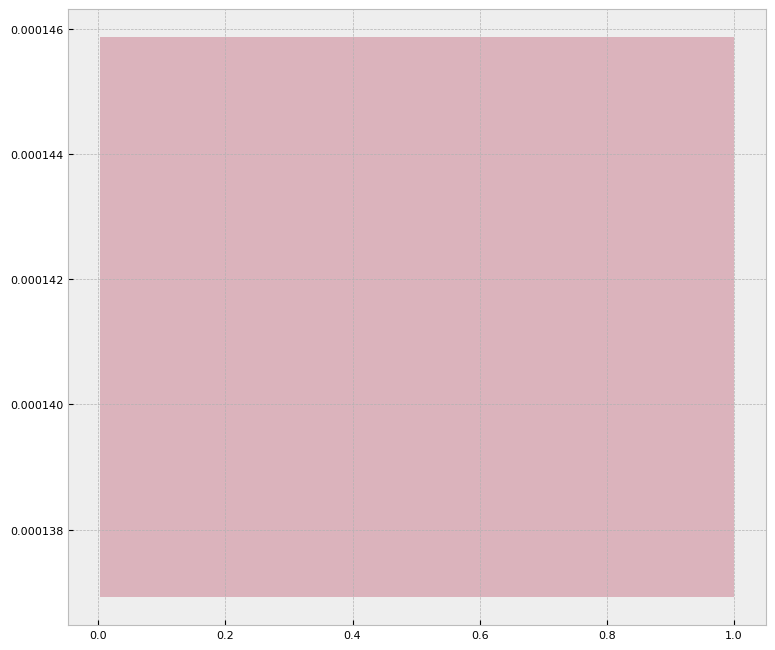

In [291]:
# Data space plot ========================================================
az.plot_hdi(
    df["transported"],
    trace.posterior.θ,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    #ax=ax[0],
    color="C1",
)

<Axes: >

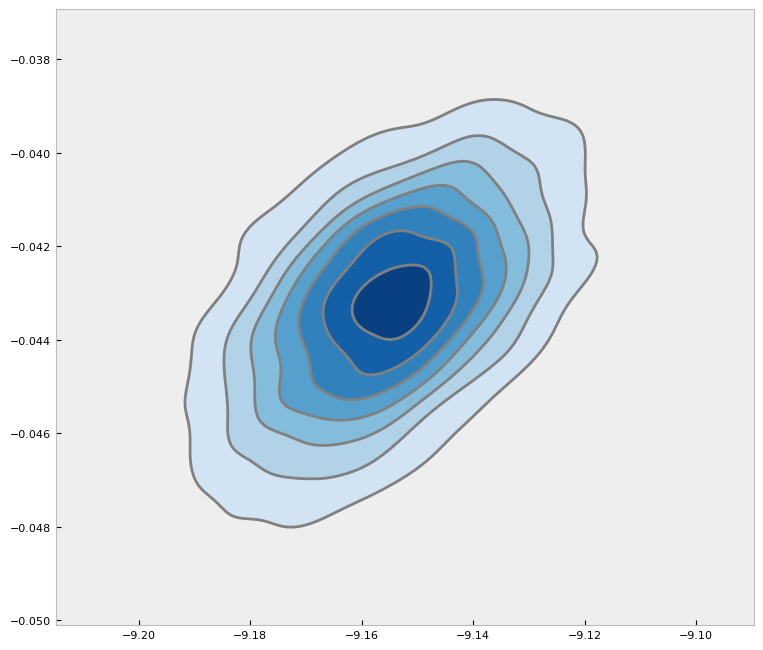

In [292]:
# Parameter space plot ===================================================
az.plot_kde(
    az.extract(trace, var_names="α"),
    az.extract(trace, var_names="β1"),
    contourf_kwargs={"cmap": "Blues"},
    #ax=ax[1],
)

In [ ]:
with pm.Model as binomial_regression_model:
    # priors
    beta0 = pm.Normal("beta0", mu=0, sigma=1)
    beta1 = pm.Normal("beta1", mu=0, sigma=1)
    # linear model
    μ = beta0 + beta1 * x
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Binomial("y", n=n, p=p, observed=data["y"], dims="observation")